In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(x, y):
    return (x - 1)**2 + 10*(x**2 - y)**2

# Gradient
def grad_f(x, y):
    dfdx = 2*(x - 1) + 40*x*(x**2 - y)
    dfdy = -20*(x**2 - y)
    return np.array([dfdx, dfdy])

# Hessienne
def hessian_f(x, y):
    f_xx = 2 + 120*x**2 - 40*y
    f_xy = -40*x
    f_yy = 20
    return np.array([[f_xx, f_xy],
                     [f_xy, f_yy]])

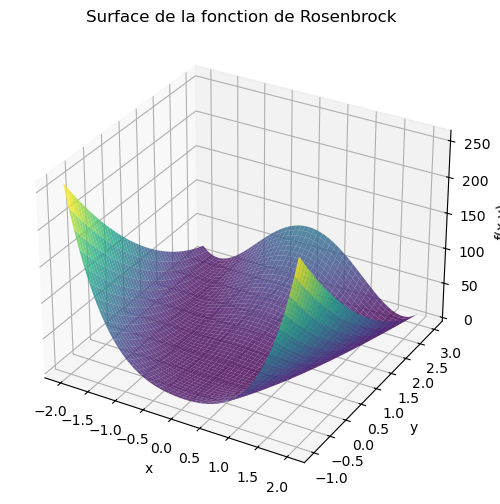

In [3]:
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title("Surface de la fonction de Rosenbrock")
plt.show()

In [4]:
Xc = np.linspace(-2, 2, 40)
Yc = np.linspace(-1, 3, 40)
is_convex = True
for xx in Xc:
    for yy in Yc:
        H = hessian_f(xx, yy)
        eigvals = np.linalg.eigvals(H)
        if np.any(eigvals < 0):
            is_convex = False
            break
    if not is_convex:
        break

print("La fonction est convexe globalement ?" , is_convex)

La fonction est convexe globalement ? False


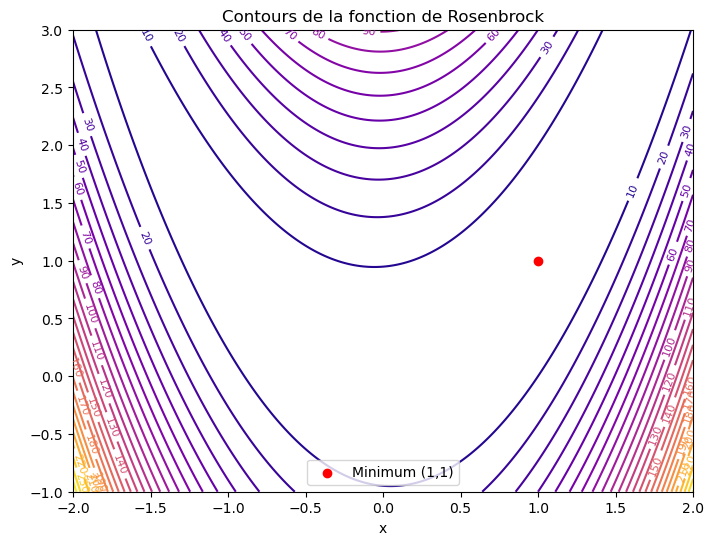

In [5]:
# -----------------------------
# 3. Contours
# -----------------------------
plt.figure(figsize=(8,6))
contours = plt.contour(X, Y, Z, levels=30, cmap='plasma')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Contours de la fonction de Rosenbrock")
plt.scatter(1,1,color='red',label='Minimum (1,1)')
plt.legend()
plt.show()

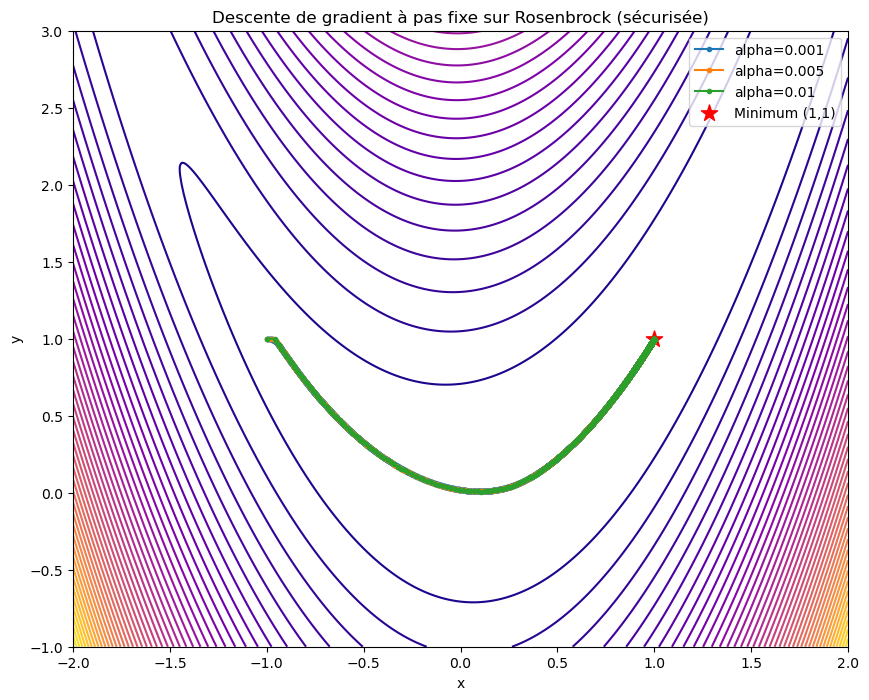

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Fonction de Rosenbrock et gradient
# -----------------------------
def f(x):
    x1, x2 = x
    return (x1 - 1)**2 + 10*(x1**2 - x2)**2

def grad_f(x):
    x1, x2 = x
    dfdx1 = 2*(x1 - 1) + 40*x1*(x1**2 - x2)
    dfdx2 = -20*(x1**2 - x2)
    return np.array([dfdx1, dfdx2])

# -----------------------------
# Descente de gradient
# -----------------------------
def gradient_descent_fixed(x0, alpha, N=1000, eps=1e-6):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    
    for k in range(N):
        d = -grad_f(x)
        x_new = x + alpha * d
        
        # arrêt si divergence détectée
        if not np.all(np.isfinite(x_new)) or np.linalg.norm(x_new) > 1e6:
            print(f"⚠️ Divergence détectée à l'itération {k} avec alpha={alpha}")
            break
        
        trajectory.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
    return np.array(trajectory)

# -----------------------------
# Application avec différents alpha
# -----------------------------
alphas = [0.001, 0.005, 0.01] 
x0 = (-1, 1)

# Grille pour contours
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = (X - 1)**2 + 10*(X**2 - Y)**2

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, levels=50, cmap="plasma")

for alpha in alphas:
    traj = gradient_descent_fixed(x0, alpha, N=5000, eps=1e-8)
    plt.plot(traj[:,0], traj[:,1], marker='o', markersize=3, label=f"alpha={alpha}")

plt.scatter(1,1,color="red",marker="*",s=150,label="Minimum (1,1)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Descente de gradient à pas fixe sur Rosenbrock (sécurisée)")
plt.legend()
plt.show()


In [ ]:

f = lambda x, y: x**2 + 7*y**2
grad_f = lambda x, y: np.array([2*x, 14*y])

def alpha_opt(x, y):
    return (x**2 + 7*y**2) / (2*(x**2 + 49*y**2))

def gradient_descent(x0, y0, alpha, max_iter=50):
    traj = [(x0, y0)]
    for _ in range(max_iter):
        grad = grad_f(x0, y0)
        x_new, y_new = np.array([x0, y0]) - alpha * grad
        if np.linalg.norm([x_new - x0, y_new - y0]):
            break
        x0, y0 = x_new, y_new
        traj.append((x0, y0))
    return np.array(traj)

def gradient_descent_optimal(x0, y0, max_iter=50, eps=1e-6):
    traj = [(x0, y0)]
    for _ in range(max_iter):
        grad = grad_f(x0, y0)
        a = alpha_opt(x0, y0)
        x_new, y_new = np.array([x0, y0]) - a * grad
        if np.linalg.norm([x_new - x0, y_new - y0]) < eps:
            break
        x0, y0 = x_new, y_new
        traj.append((x0, y0))
    return np.array(traj)


